#### Forecasting Using FbProphet

In [1]:
 ### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import numpy as np
import fbprophet
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df=pd.read_excel('C:\\Project -DS\\DEXINUS (1).xls')

In [3]:
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [4]:
df.tail()

,observation_date,DEXINUS
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


In [5]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


<AxesSubplot:>

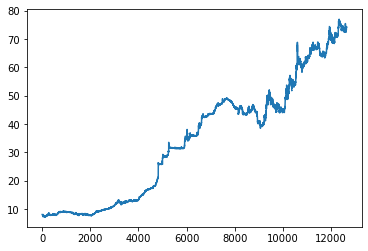

In [6]:
df.y.plot()

In [7]:
df.isnull().sum()

ds      0
y     494
dtype: int64

In [8]:
df.ffill(inplace=True)

In [9]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [10]:
df.tail()

,ds,y
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


In [11]:
from fbprophet import Prophet

In [12]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [13]:
# Initialize the Model
model=Prophet()

In [14]:
df.columns

Index(['ds', 'y'], dtype='object')

In [15]:
model.fit(df) #taking yearly seasonality and disabled daily seasonality

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [17]:
df.tail()

,ds,y
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


In [18]:
### Create future dates of 30 days
future_dates=model.make_future_dataframe(periods=30)

In [19]:
future_dates.tail()

,ds
12674,2021-07-21
12675,2021-07-22
12676,2021-07-23
12677,2021-07-24
12678,2021-07-25


In [20]:
prediction=model.predict(future_dates)

In [21]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1973-01-02,7.538509,5.363885,9.620581,7.538509,7.538509,-0.048675,-0.048675,-0.048675,-0.086047,-0.086047,-0.086047,0.037373,0.037373,0.037373,0.0,0.0,0.0,7.489834
1,1973-01-03,7.539725,5.184550,9.554787,7.539725,7.539725,-0.058185,-0.058185,-0.058185,-0.091035,-0.091035,-0.091035,0.032850,0.032850,0.032850,0.0,0.0,0.0,7.481540
2,1973-01-04,7.540941,5.382820,9.858133,7.540941,7.540941,-0.063687,-0.063687,-0.063687,-0.091705,-0.091705,-0.091705,0.028019,0.028019,0.028019,0.0,0.0,0.0,7.477255
3,1973-01-05,7.542158,5.308952,9.695540,7.542158,7.542158,-0.079936,-0.079936,-0.079936,-0.102817,-0.102817,-0.102817,0.022881,0.022881,0.022881,0.0,0.0,0.0,7.462222
4,1973-01-08,7.545806,5.341552,9.595821,7.545806,7.545806,-0.086603,-0.086603,-0.086603,-0.092389,-0.092389,-0.092389,0.005787,0.005787,0.005787,0.0,0.0,0.0,7.459204


In [22]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
12674,2021-07-21,76.753871,74.473503,78.763638,76.753871,76.753871,-0.122594,-0.122594,-0.122594,-0.091035,-0.091035,-0.091035,-0.031560,-0.031560,-0.031560,0.0,0.0,0.0,76.631277
12675,2021-07-22,76.760681,74.462721,78.775279,76.760681,76.760681,-0.127804,-0.127804,-0.127804,-0.091705,-0.091705,-0.091705,-0.036098,-0.036098,-0.036098,0.0,0.0,0.0,76.632878
12676,2021-07-23,76.767492,74.348537,78.938799,76.767492,76.767492,-0.142496,-0.142496,-0.142496,-0.102817,-0.102817,-0.102817,-0.039679,-0.039679,-0.039679,0.0,0.0,0.0,76.624996
12677,2021-07-24,76.774302,74.768994,79.141871,76.774302,76.774302,0.189780,0.189780,0.189780,0.231997,0.231997,0.231997,-0.042217,-0.042217,-0.042217,0.0,0.0,0.0,76.964082
12678,2021-07-25,76.781112,74.693984,79.272568,76.781112,76.781112,0.188349,0.188349,0.188349,0.231997,0.231997,0.231997,-0.043648,-0.043648,-0.043648,0.0,0.0,0.0,76.969461


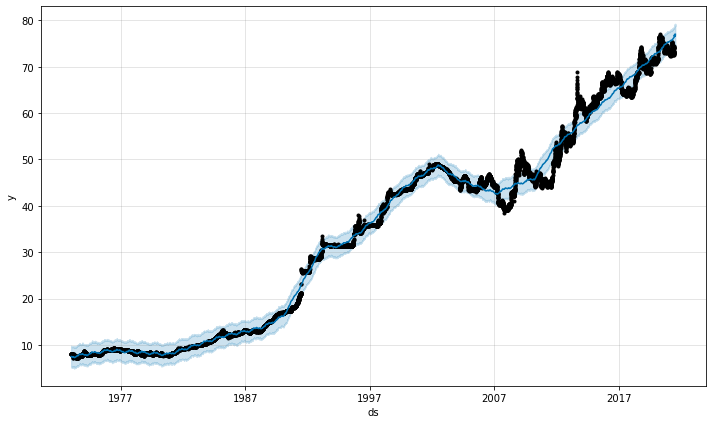

In [23]:
### plot the predicted projection
model.plot(prediction) #blue is predicted porjection
plt.show()

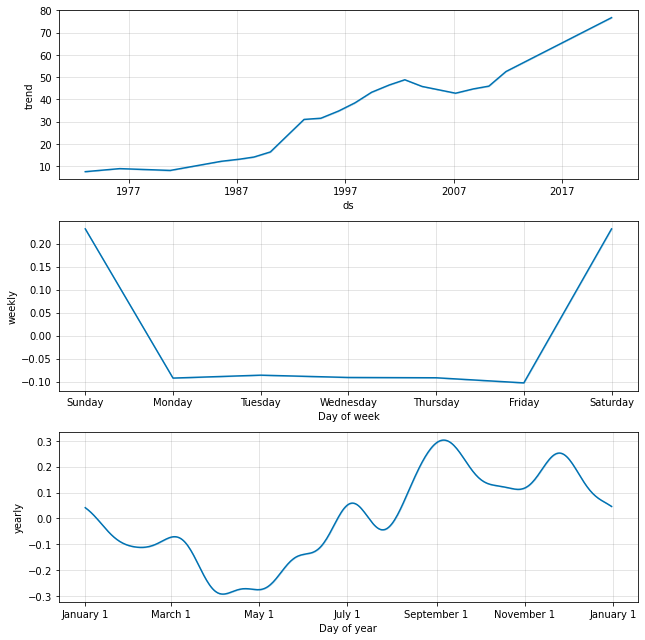

In [24]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)
plt.show()

In [25]:
df.head(1000)

,ds,y
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00
...,...,...
995,1976-10-26,8.93
996,1976-10-27,8.93
997,1976-10-28,8.93
998,1976-10-29,8.97


In [26]:
df.tail()

,ds,y
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14
12648,2021-06-25,74.14


In [27]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='15 days', horizon = '30 days')
df_cv.head() #from 1975 to 2020 is test data set

INFO:fbprophet:Making 93 forecasts with cutoffs between 1975-02-22 00:00:00 and 2020-06-25 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1975-02-24,7.756285,7.679031,7.843595,7.94,1975-02-22
1,1975-02-25,7.744929,7.656296,7.827068,7.94,1975-02-22
2,1975-02-26,7.731869,7.647252,7.815824,7.94,1975-02-22
3,1975-02-27,7.713052,7.627783,7.794971,7.94,1975-02-22
4,1975-02-28,7.716970,7.632601,7.801317,7.75,1975-02-22


In [38]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
24241,2021-06-21,78.070798,75.682576,80.279947,74.18,2020-06-25
24242,2021-06-22,78.091394,75.735821,80.253196,74.37,2020-06-25
24243,2021-06-23,78.101647,75.864445,80.304198,74.13,2020-06-25
24244,2021-06-24,78.115633,75.586153,80.500731,74.14,2020-06-25
24245,2021-06-25,78.119395,75.818636,80.240600,74.14,2020-06-25


In [35]:

from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,7.744609,2.782914,1.765393,0.045697,0.033863,0.385107
1,38 days,7.740190,2.782120,1.765262,0.045737,0.033952,0.386345
2,39 days,7.761674,2.785978,1.764803,0.045796,0.034060,0.388251
3,40 days,7.779440,2.789165,1.767501,0.045932,0.034248,0.387943
4,41 days,7.829528,2.798129,1.774945,0.046168,0.034434,0.385664


In [30]:
#pm takes yhat and y from cv and compute mse, rmse accuracy . coverage is diff btw yhat lower and upper

In [36]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,7.744609,2.782914,1.765393,0.045697,0.033863,0.385107
1,38 days,7.740190,2.782120,1.765262,0.045737,0.033952,0.386345
2,39 days,7.761674,2.785978,1.764803,0.045796,0.034060,0.388251
3,40 days,7.779440,2.789165,1.767501,0.045932,0.034248,0.387943
4,41 days,7.829528,2.798129,1.774945,0.046168,0.034434,0.385664
...,...,...,...,...,...,...,...
324,361 days,15.611052,3.951082,2.889703,0.081570,0.070893,0.394227
325,362 days,15.665741,3.957997,2.898496,0.081872,0.070829,0.393109
326,363 days,15.690371,3.961107,2.901174,0.081981,0.070953,0.393146
327,364 days,15.709895,3.963571,2.902088,0.082085,0.070881,0.393903


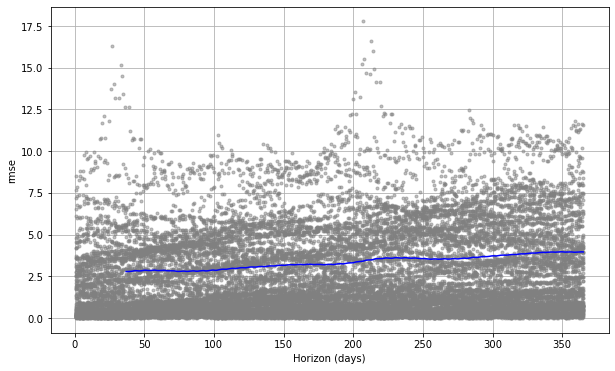

In [37]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')